In [1]:
#!wget https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz
The center of Angola is located at 41°38′13″N 85°0′3″W, the intersection of U.S. 20 and State Road 127.

In [66]:
#! wget ftp://ftp.cdc.noaa.gov/Datasets/udel.airt.precip/air.mon.mean.v401.nc

--2018-07-10 11:10:46--  ftp://ftp.cdc.noaa.gov/Datasets/udel.airt.precip/air.mon.mean.v401.nc
           => ‘air.mon.mean.v401.nc’
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/udel.airt.precip ... done.
==> SIZE air.mon.mean.v401.nc ... 241816997
==> PASV ... done.    ==> RETR air.mon.mean.v401.nc ... done.
Length: 241816997 (231M) (unauthoritative)

air.mon.mean.v401.n 100%[===================>] 230.61M   498KB/s    in 5m 30s  

2018-07-10 11:16:17 (715 KB/s) - ‘air.mon.mean.v401.nc’ saved [241816997]



In [67]:
#! wget ftp://ftp.cdc.noaa.gov/Datasets/udel.airt.precip/air.mon.ltm.v401.nc

--2018-07-10 11:18:37--  ftp://ftp.cdc.noaa.gov/Datasets/udel.airt.precip/air.mon.ltm.v401.nc
           => ‘air.mon.ltm.v401.nc’
Resolving ftp.cdc.noaa.gov... 140.172.38.117
Connecting to ftp.cdc.noaa.gov|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/udel.airt.precip ... done.
==> SIZE air.mon.ltm.v401.nc ... 18669700
==> PASV ... done.    ==> RETR air.mon.ltm.v401.nc ... done.
Length: 18669700 (18M) (unauthoritative)

air.mon.ltm.v401.nc 100%[===================>]  17.80M  1.49MB/s    in 10s     

2018-07-10 11:18:48 (1.75 MB/s) - ‘air.mon.ltm.v401.nc’ saved [18669700]



In [230]:
import xarray as xr
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

from ingridlib.trend import trend
from ingridlib.openurl import openurl

In [169]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version3b/.sst/dods'
ds = xr.open_dataset(url, decode_times=False, drop_variables='zlev').squeeze()
ds = ds.rename({'T':'time','X':'longitude','Y':'latitude'})
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 180, time: 1974)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 ...
  * time       (time) float32 -1271.5 -1270.5 -1269.5 -1268.5 -1267.5 ...
  * latitude   (latitude) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 ...
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  IRIDL

In [170]:
#files = glob('/net/haden/home/naomi/ncep-daily/air.sig995*.nc')
#sst_daily = xr.open_mfdataset(files)
#files


In [171]:
sst_IndNE = ds.sst.sel(latitude=41.5, longitude=-85.5, method='nearest').squeeze()

#sst_IndNE['time'] = pd.date_range('1854-01-01', freq='MS', periods=ds.time.size)
sst_IndNE

<xarray.DataArray 'sst' (time: 1974)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    longitude  float32 0.0
  * time       (time) float32 -1271.5 -1270.5 -1269.5 -1268.5 -1267.5 ...
    latitude   float32 42.0
Attributes:
    pointwidth:          1.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    valid_min:           -3.0
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature
    standard_name:       sea_surface_temperature

In [172]:
sst_daily

<xarray.Dataset>
Dimensions:    (lat: 73, lon: 144, nbnds: 2, time: 25756)
Coordinates:
  * time       (time) datetime64[ns] 1948-01-01 1948-01-02 1948-01-03 ...
  * lat        (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 ...
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 dask.array<shape=(25756, 73, 144), chunksize=(25756, 73, 144)>
    time_bnds  (time, nbnds) float64 dask.array<shape=(25756, 2), chunksize=(25756, 2)>
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1979)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    history:        created 95/02/06 by Hoop (netCDF2.3)\nConverted to chunke...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [249]:
ds2 = openurl('air.mon.mean.v401.nc').resample(time='AS').mean(dim='time')
nt = ds2.time.shape[0]
ds2['time'] = np.arange(nt) 
tr=trend(ds2.air.sel(lat=slice(20,60),lon=slice(220,300)))

1900-01-01T00:00:00.000000000 to 2014-12-01T00:00:00.000000000


/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


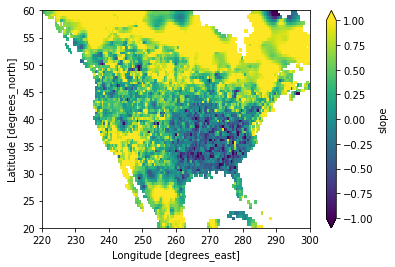

In [254]:
(tr*nt).slope.plot(vmin=-1,vmax=1)

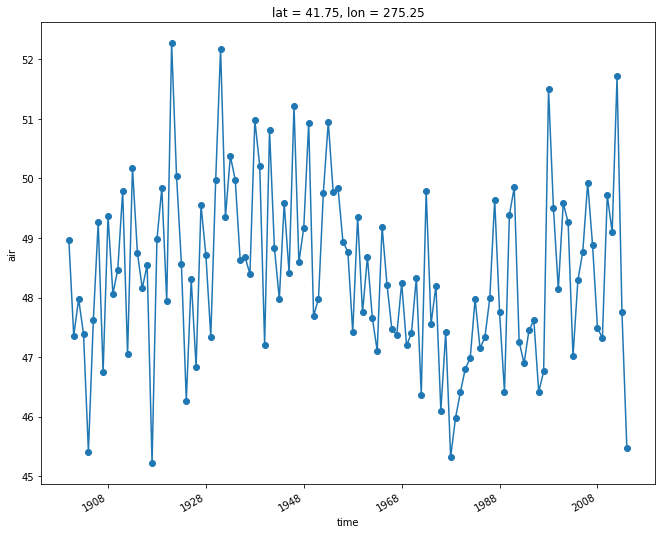

In [229]:
ts1 = ds2.air.sel(lat=41.5, lon=275, method='nearest').squeeze()*9/5+32 
ts2 = ds2.air.sel(lat=34, lon=242, method='nearest').squeeze()*9/5+32  # LA


plt.figure(figsize=(11,8.5))
ts1.resample(time='AS').mean(dim='time').plot(marker='o')
#ts2.resample(time='AS').mean(dim='time').plot(marker='x')

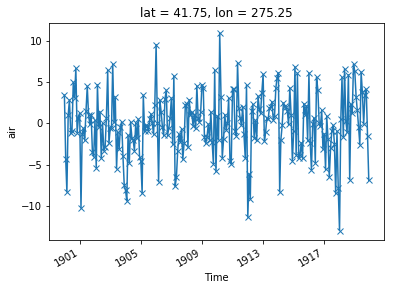

In [211]:
ts_clim = ts.groupby('time.month').mean(dim='time')
ts_anom = ts.groupby('time.month') - ts_clim

del ts_anom['month']
#ts.sel(time=slice('2000-01-01', '2015-01-01')).plot(marker='o')
ts1 = (ts_anom).sel(time=slice('1900-01-01', '1919-12-01'))
tsa = (ts).sel(time=slice('1900-01-01', '1919-12-01'))
time1 = ts_anom.time.sel(time=slice('1900-01-01', '1919-12-01'))
(ts_anom).sel(time=slice('1900-01-01', '1919-12-01')).plot(marker='x')

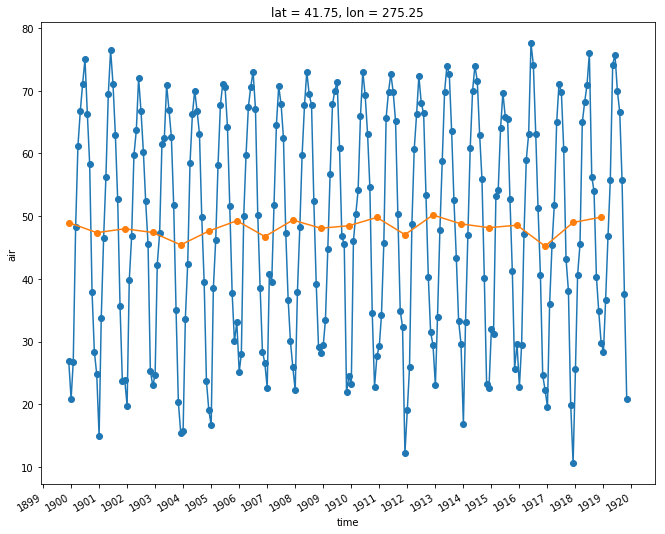

In [212]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker
plt.figure(figsize=(11,8.5))
ax = plt.axes()
tsa.plot(marker='o')
tsa.resample(time='AS').mean(dim='time').plot(marker='o')



ax.xaxis.set_major_locator(dates.MonthLocator(interval=12))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=12))

# Labeling the 12 months on x-axis at the positions located above
#ax.xaxis.set_major_formatter(ticker.NullFormatter())
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%b %y'))

# Centering month labels in between the ticks and removing undesirable ticks
#xticks = ax.xaxis.get_minor_ticks()
#for xtick in xticks:
#    xtick.tick1line.set_markersize(0)
#    xtick.tick2line.set_markersize(0)
#    xtick.label1.set_horizontalalignment('center')
plt.savefig('test.eps', format='eps', dpi=1000)

In [193]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
import matplotlib.dates as dates
import matplotlib.ticker as ticker
plt.figure(figsize=(20, 8))
ax = plt.axes()
plt.plot(time1,ts1,marker='o',linestyle='None')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(time[0], 'Y')
datemax = np.datetime64(time[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


(682639.0, 737060.0)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbfac18c6a8> (for post_execute):


RuntimeError: Locator attempting to generate 1789 ticks from 682639.0 to 737060.0: exceeds Locator.MAXTICKS

RuntimeError: Locator attempting to generate 1789 ticks from 682639.0 to 737060.0: exceeds Locator.MAXTICKS

<Figure size 1440x576 with 1 Axes>